To generate the table, run propeller_lookup_table.py. Once generated successfully, the data will be stored in lookup_table folder. The following section is an example to generate a subset of a lookup table. For debug and development purpose, generating a small lookup table as trial can save time. 

In [ ]:
import numpy as np
from propeller_lookup_table import PropellerLookupTable
import blade_params

PropellerLookupTable.Maker.make_propeller_lookup_table("apc_8x6_simple", blade_params.apc_8x6(), np.array(PropellerLookupTable.Maker._DEFAULT_OMEGA_RANGE[6:8]), np.array(
    PropellerLookupTable.Maker._DEFAULT_U_FREE_X_RANGE[8:9]), np.array(PropellerLookupTable.Maker._DEFAULT_PITCH_RANGE[5:7]))

The following example generates the full lookup table of apc_8x6.

In [ ]:
import numpy as np
from propeller_lookup_table import PropellerLookupTable
import blade_params

PropellerLookupTable.Maker.make_propeller_lookup_table("apc_8x6")

To use the lookup table, users can find the table data under lookup_table. The following example shows how to load the lookup table and query the rotor forces.

[PropellerLookupTable] Reading data from lookup_table\apc_8x6.yaml


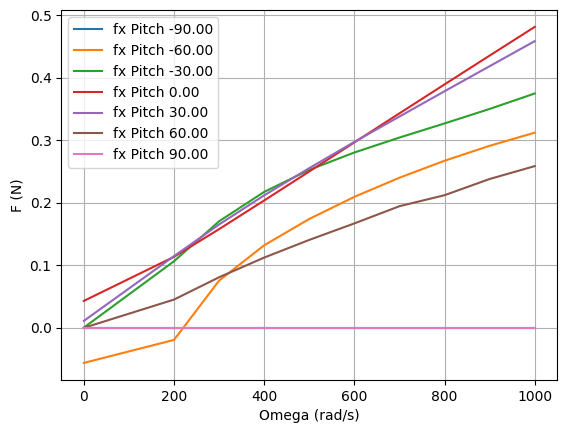

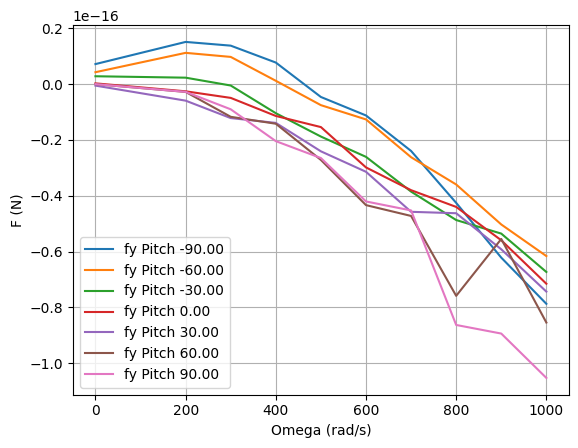

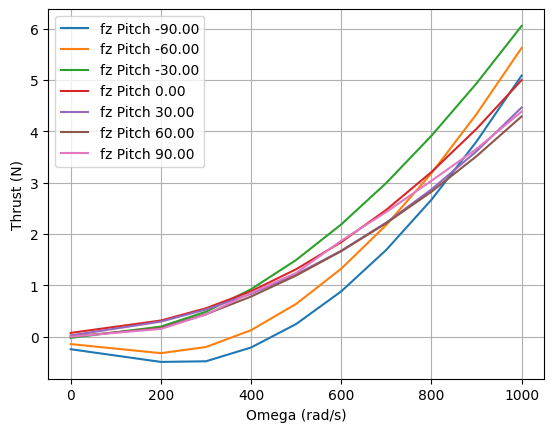

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable

apc_8x6 = PropellerLookupTable.Reader("apc_8x6")

u_free_x_range = [13]
pitch_range = np.deg2rad([-90, -60, -30, 0, 30, 60, 90])
omega_range = np.array([0, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

forces_grouped_by_pitch_then_omega = []
for u_free_x in u_free_x_range:
    for pitch in pitch_range:
        forces_by_omega = []
        for omega in omega_range:
            forces_by_omega.append(apc_8x6.query_forces_from_table(u_free_x, pitch, omega))
        forces_grouped_by_pitch_then_omega.append(forces_by_omega)
forces_grouped_by_pitch_then_omega = np.array(forces_grouped_by_pitch_then_omega)

plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 0], label=f"fx Pitch {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("F (N)")
plt.legend()
plt.grid()    
plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 1], label=f"fy Pitch {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("F (N)")
plt.legend()
plt.grid()    
plt.figure()
for i, pitch in enumerate(pitch_range):
    plt.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 2], label=f"fz Pitch {np.rad2deg(pitch):.2f}")
plt.xlabel("Omega (rad/s)")
plt.ylabel("Thrust (N)")
plt.legend()
plt.grid()
plt.show()




The following example shows how to compute rotor forces.

[PropellerLookupTable] Reading data from lookup_table\apc_8x6.yaml
fig 1: rotor straight up
f_x: 0.2966111074186709, f_y: -4.856224351561858e-17, f_z: 3.2006747492463843
fig 2: rotor frame rotated in x-y plane (should not change the force)
f_x: 0.2966111074186709, f_y: -4.856224351561858e-17, f_z: 3.2006747492463843
fig 3: forward velocity (should be the same as fig 2)
f_x: 0.2966111074186709, f_y: -4.856224351561858e-17, f_z: 3.2006747492463843
fig 4: z axis along the free stream
f_x: 2.790909192126838, f_y: -1.7346526659486435e-16, f_z: -5.220553927425757e-17


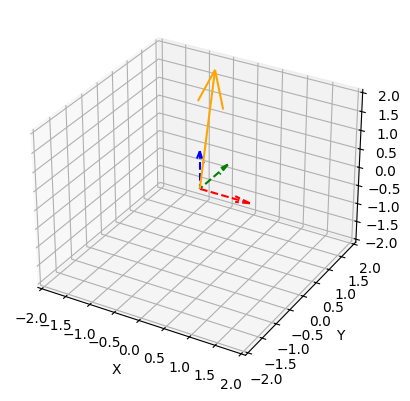

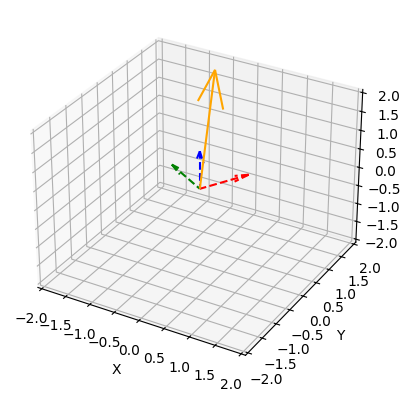

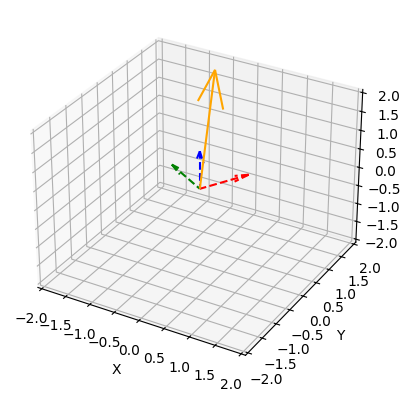

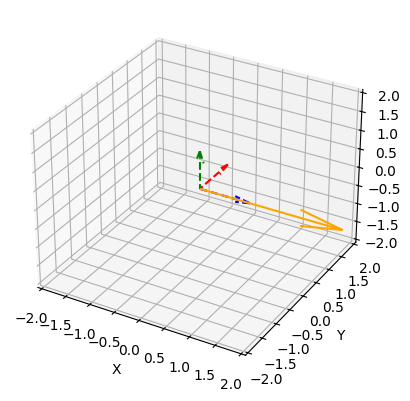

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable

apc_8x6 = PropellerLookupTable.Reader("apc_8x6")
u_free = np.array([10, 0, 0])
v_forward = np.array([0, 0, 0])
omega = 800
r_disk = np.eye(3)
is_ccw = True

print("fig 1: rotor straight up")
forces = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces)

print("fig 2: rotor frame rotated in x-y plane (should not change the force)")
theta = np.pi / 3
r_disk = np.array([[np.cos(theta), np.sin(theta), 0],   # x axis after transpose
                   [-np.sin(theta), np.cos(theta), 0],  # y axis after transpose
                   [0, 0, 1]]).T    # z axis after transpose
forces = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces)


print("fig 3: forward velocity (should be the same as fig 2)")
v_forward = np.array([-10, 0, 0])
u_free = np.array([0, 0, 0])
forces = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces)

print("fig 4: z axis along the free stream")
r_disk = np.array([[0, 1, 0],   # x axis after transpose
                   [0, 0, 1],   # y axis after transpose
                   [1, 0, 0]]).T    # z axis after transpose
forces = apc_8x6.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw)
PropellerLookupTable.Reader.plot_rotor_force(r_disk, forces)

plt.show()
